In [78]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
import sys
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline
# np행렬 생략 부분 출력 펼쳐서 보기 옵션
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [67]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()
# print(len(train_X), len(test_X))
train_X.shape, test_X.shape, train_Y.shape, test_Y.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [79]:
# 코드 뜯어봐야함..

from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# sorting based on index
idx = np.argsort(train_labels)
train_images = train_images[idx]
train_labels = train_labels[idx]

idx = np.argsort(test_labels)
test_images = test_images[idx]
test_labels = test_labels[idx]

labels = ["T-Shirt", "Trouser", "Pullover", "Dress", "Coat", 
          "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

label_mapping = dict(zip(labels, range(10)))

def get_data(mapping, classes):
    X_train, X_test, y_train, y_test = [], [], [], []
    for cls in classes:
        idx = mapping[cls]
        start = idx*6000
        end = idx*6000+6000
        X_train.append(train_images[start: end])
        y_train.append(train_labels[start: end])
        start = idx*1000
        end = idx*1000+1000
        X_test.append(test_images[start: end])
        y_test.append(test_labels[start: end])
    return X_train, X_test, y_train, y_test


train_X, test_X, train_Y, test_Y = get_data(label_mapping, 
                                            classes=["T-Shirt", "Trouser", "Shirt"])

In [85]:
test_X[0]

Output hidden; open in https://colab.research.google.com to view.

In [54]:
test_Y

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1, 2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 2, 3, 9, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2, 3, 6, 7, 2, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8, 0, 0, 9, 9, 3, 0, 8, 4, 1, 5, 4, 1, 9, 1, 8, 6, 2, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 6, 2, 2, 4, 4, 1, 4, 5, 0, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 4, 7, 4, 2, 0, 5, 2, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 6, 7, 9, 9, 4, 4, 7, 1, 2, 1, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3, 1, 6, 7, 2, 8, 5, 2, 0, 7, 7, 6, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 4, 5, 6, 9, 2, 6, 8, 6, 4, 2, 2, 9, 7, 6, 5, 5, 2, 8, 5, 2, 3, 0, 4, 8, 0, 0, 6, 3, 8, 9, 6, 1, 3, 0, 2, 3, 0, 8, 3, 7, 4, 0, 1, 6, 3, 0, 6, 6, 7, 5, 4, 5, 9, 5, 6, 5, 5, 1, 9, 8, 8, 3, 3, 6, 8, 0, 0, 2, 9, 7, 7, 1, 3, 6, 4, 2, 4, 9, 1, 6, 4, 8, 2, 6, 5, 4, 6, 7, 7, 7, 3, 3, 

In [59]:
np.where(test_Y == 5)
# np.delete(test_Y, np.where(test_Y == 5))

(array([   8,   11,   21,   37,   52,   63,   82,   84,   90,  106,  111,  114,  129,  139,  154,  171,  221,  236,  240,  253,  254,  257,  288,  290,  292,  294,  295,  323,  369,  380,  384,  393,  418,  420,  423,  445,  449,  480,  484,  502,  516,  532,  535,  542,  552,  559,  567,  588,  592,  596,  641,  647,  654,  658,  676,  690,  693,  722,  729,  735,  745,  775,  785,  795,  812,  814,  819,  828,  831,  846,  852,  865,  868,  891,  895,  896,  898,  902,  912,  913,  945,  946,  952,  958,  961,  978,  993, 1002, 1003, 1006, 1011, 1027, 1037, 1039, 1041, 1051, 1067, 1072, 1090, 1092, 1098, 1105, 1106, 1110, 1112, 1137, 1149, 1175, 1176, 1179, 1180, 1200, 1211, 1212, 1228, 1237, 1240, 1245, 1266, 1278, 1284, 1289, 1290, 1292, 1307, 1321, 1325, 1328, 1363, 1373, 1384, 1405, 1411, 1415, 1419, 1420, 1435, 1436, 1439, 1441, 1442, 1448, 1453, 1456, 1464, 1480, 1501, 1503, 1511, 1513, 1519, 1532, 1556, 1563, 1568, 1577, 1579, 1597, 1617, 1637, 1646, 1656, 1663, 1666, 1668, 16

In [69]:
# 센달 인덱스 접근... 5
test_y = np.where(test_Y == 5)
test_idx = []
for test_y_list in test_y:
    # print(test_y_list)
    for idx in test_y_list:
        # print(idx)
        test_idx.append(idx)
print(test_idx)
# # np.delete(test_X, test_idx)

[8, 11, 21, 37, 52, 63, 82, 84, 90, 106, 111, 114, 129, 139, 154, 171, 221, 236, 240, 253, 254, 257, 288, 290, 292, 294, 295, 323, 369, 380, 384, 393, 418, 420, 423, 445, 449, 480, 484, 502, 516, 532, 535, 542, 552, 559, 567, 588, 592, 596, 641, 647, 654, 658, 676, 690, 693, 722, 729, 735, 745, 775, 785, 795, 812, 814, 819, 828, 831, 846, 852, 865, 868, 891, 895, 896, 898, 902, 912, 913, 945, 946, 952, 958, 961, 978, 993, 1002, 1003, 1006, 1011, 1027, 1037, 1039, 1041, 1051, 1067, 1072, 1090, 1092, 1098, 1105, 1106, 1110, 1112, 1137, 1149, 1175, 1176, 1179, 1180, 1200, 1211, 1212, 1228, 1237, 1240, 1245, 1266, 1278, 1284, 1289, 1290, 1292, 1307, 1321, 1325, 1328, 1363, 1373, 1384, 1405, 1411, 1415, 1419, 1420, 1435, 1436, 1439, 1441, 1442, 1448, 1453, 1456, 1464, 1480, 1501, 1503, 1511, 1513, 1519, 1532, 1556, 1563, 1568, 1577, 1579, 1597, 1617, 1637, 1646, 1656, 1663, 1666, 1668, 1677, 1685, 1690, 1727, 1747, 1757, 1762, 1769, 1770, 1774, 1776, 1794, 1797, 1799, 1819, 1824, 1825, 1828

In [70]:
train_y = np.where(train_Y == 5)
train_idx = []
for train_y_list in train_y:
    for idx in train_y_list:
        train_idx.append(idx)
print(train_idx)

[8, 9, 12, 13, 30, 36, 43, 60, 62, 63, 82, 116, 120, 121, 133, 155, 172, 173, 177, 192, 201, 213, 217, 224, 227, 230, 244, 246, 257, 267, 274, 300, 303, 320, 343, 345, 349, 363, 371, 384, 386, 389, 393, 401, 406, 435, 459, 466, 467, 469, 475, 521, 538, 552, 561, 576, 577, 593, 605, 614, 620, 655, 657, 682, 683, 691, 702, 705, 706, 710, 734, 738, 760, 764, 774, 775, 777, 784, 787, 803, 814, 843, 845, 857, 899, 902, 914, 916, 919, 921, 927, 935, 936, 943, 947, 952, 956, 986, 992, 994, 1006, 1007, 1012, 1025, 1045, 1058, 1076, 1082, 1085, 1111, 1148, 1153, 1154, 1180, 1187, 1191, 1208, 1217, 1222, 1223, 1227, 1235, 1238, 1250, 1259, 1269, 1281, 1285, 1289, 1298, 1307, 1310, 1313, 1314, 1337, 1339, 1344, 1347, 1359, 1362, 1368, 1403, 1407, 1426, 1427, 1429, 1431, 1434, 1439, 1443, 1455, 1457, 1458, 1466, 1476, 1487, 1490, 1497, 1522, 1538, 1567, 1572, 1575, 1623, 1646, 1658, 1671, 1692, 1728, 1733, 1734, 1741, 1750, 1769, 1771, 1781, 1783, 1786, 1792, 1795, 1798, 1801, 1832, 1835, 1841, 18

In [71]:
# test_Y 값에서 5인 값들 삭제 성공.
test_Y = np.delete(test_Y, test_idx)
train_Y = np.delete(train_Y, train_idx)
test_Y.shape, train_Y.shape

((9000,), (54000,))

In [74]:
# 인덱스 번호를 가지고... test_X에 해당하는 인덱스 값 삭제..
test_X = np.delete(test_X, test_X[test_idx])
train_X = np.delete(train_X, train_X[train_idx])

In [ ]:
a = np.array([1,2,3,4,5])

In [66]:
train_X[0]

0

In [75]:
train_X.shape, test_X.shape, train_Y.shape, test_Y.shape

((47039744,), (7839542,), (54000,), (9000,))

TypeError: ignored

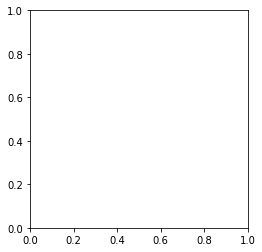

In [80]:
plt.imshow(train_X[2], cmap='pink')
plt.colorbar()
plt.show()
print('정답범주', train_Y[2])

In [123]:
print(train_X[2].shape)
print(test_X[2].shape)
print(test_X[[2]].shape)
# print(test_X)

(28, 28)
(28, 28)
(1, 28, 28)


In [124]:
train_X = train_X / 255.0
test_X = test_X / 255.0
# print(train_X[2])

In [125]:
# 다층 퍼셉트론
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [ ]:
# 밑에 vggnet 모방 코드 사용 하려면 여기 셀 실행 해야함/ input 을 맞춰주기 위함.

print(train_X.shape, test_X.shape)
# (미니배치크기, 입력이미지행수, 입력이미지열수, 입력이미지체널수)
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
# vggnet 모방 모델
model= tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=32,padding='same',activation='relu'),
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=64,padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 256, padding = 'valid', activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=256, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=10, activation = 'softmax')
])

In [126]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [127]:
history = model.fit(train_X, train_Y, epochs=500, validation_split=0.25,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')])

Epoch 1/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.5250 - accuracy: 0.8160 - val_loss: 0.4891 - val_accuracy: 0.8273
Epoch 2/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3900 - accuracy: 0.8608 - val_loss: 0.3921 - val_accuracy: 0.8599
Epoch 3/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3494 - accuracy: 0.8724 - val_loss: 0.3531 - val_accuracy: 0.8719
Epoch 4/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3210 - accuracy: 0.8809 - val_loss: 0.3559 - val_accuracy: 0.8692
Epoch 5/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3048 - accuracy: 0.8875 - val_loss: 0.3353 - val_accuracy: 0.8808
Epoch 6/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2874 - accuracy: 0.8923 - val_loss: 0.3496 - val_accuracy: 0.8727
Epoch 7/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2740 - accuracy: 0.8992 - val_loss: 0.3161 - val_ac

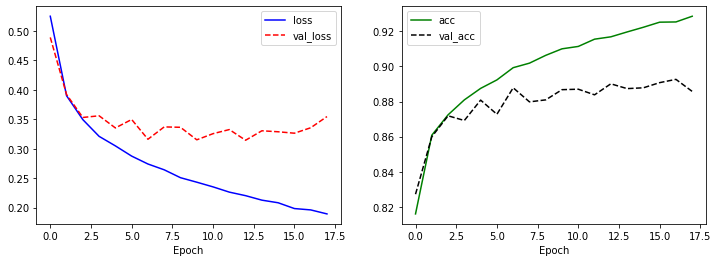

In [128]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label = 'acc')
plt.plot(history.history['val_accuracy'],'k--',label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [11]:
model.evaluate(test_X,test_Y)

313/313 [==============================] - 0s 925us/step - loss: 0.3744 - accuracy: 0.8837


[0.3743975758552551, 0.8837000131607056]

In [ ]:
# 예측수행 부분... 우리가 가지고 있는 사진을 넣었을때, 이 이미지에 대한 예측 범주 출력
# 수업시간때는, 테스트 데이터 안의 사진을 가지고 수행하였다.
# 이미지 불러오는 방법 찾아보기
# 불러온 이미지 변수에 담아서, model.predict(변수명)
# 예측 수행 범주 확인해주기.

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


(791, 577, 3)
########################################
VERSION : 1.1 
 Interesting tools to be added to the workflow pipe!!!
########################################


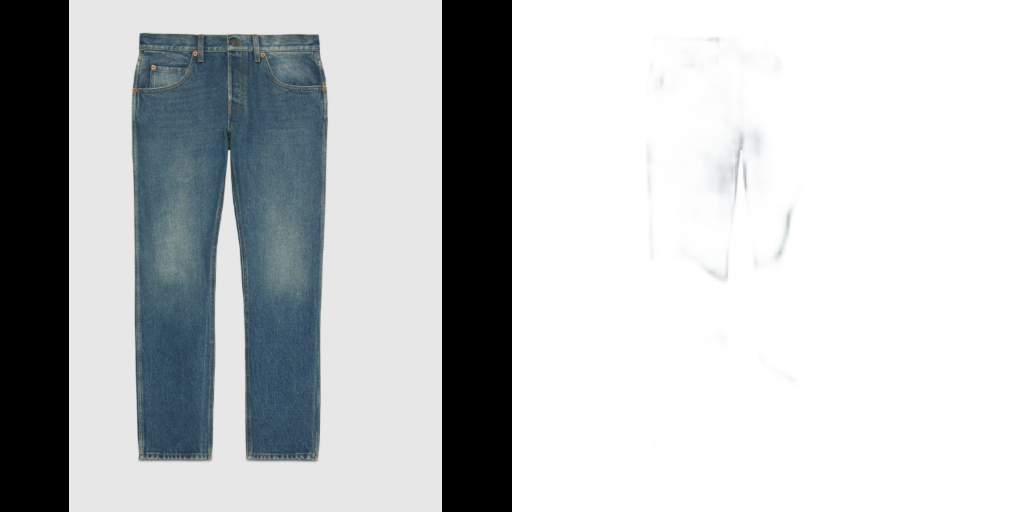

In [135]:
# 모델 임포트 후 의상 부분만 추출하는 코드.

# GPU메모리 증가 허용하기 코드..내가 알아야할 필요가 있을지..? 뭔 이야기인지는 모르겠음.
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# 이미지를 계속해서 바꿔바며 할수 있는 방법을 생각해야함 요기 f는 경로 입력.
f = '/content/청바지1.jpg'
# 훈련된 모델 가지고 오는 경로 설정.
saved = load_model("/content/drive/My Drive/Colab Notebooks/데이터/topwears.h5")

class fashion_tools(object):
    def __init__(self,imageid,model,version=1.1):
        self.imageid = imageid
        self.model   = model
        self.version = version
        
    def get_dress(self,stack=False):
        """limited to top wear and full body dresses (wild and studio working)"""
        """takes input rgb ----> return PNG"""

        name =  self.imageid
        file = cv2.imread(name)
        print(file.shape)

        # b,g,r= cv2.split(file)
        # file = cv2.merge([b,g,r])

        file = tf.image.resize_with_pad(file,target_height=512,target_width=512)
        rgb  = file.numpy()
        file = np.expand_dims(file,axis=0)/ 255.
        seq = self.model.predict(file)
        seq = seq[3][0,:,:,0]
        seq = np.expand_dims(seq,axis=-1)
        c1x = rgb*seq
        c2x = rgb*(1-seq)
        cfx = c1x+c2x
        dummy = np.ones((rgb.shape[0],rgb.shape[1],1))
        rgbx = np.concatenate((rgb,dummy*255),axis=-1)
        rgbs = np.concatenate((cfx,seq*255.),axis=-1)
        if stack:
            stacked = np.hstack((rgbx,rgbs))
            return stacked
        else:
            return rgbs
        
    def get_patch(self):
        return None

    def development(self):
        n_ = '\n'
        return (f"VERSION : {self.version} {n_} Interesting tools to be added to the workflow pipe!!!")

###running code
api    = fashion_tools(f,saved)
image = api.get_dress(True)

print("########################################")
print(api.development())
print("########################################")

# cv2.imwrite('result.jpeg', image_)
cv2_imshow(image)
# print(image.shape)

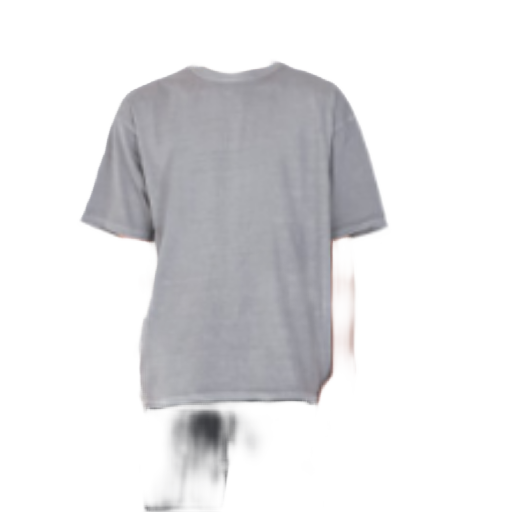

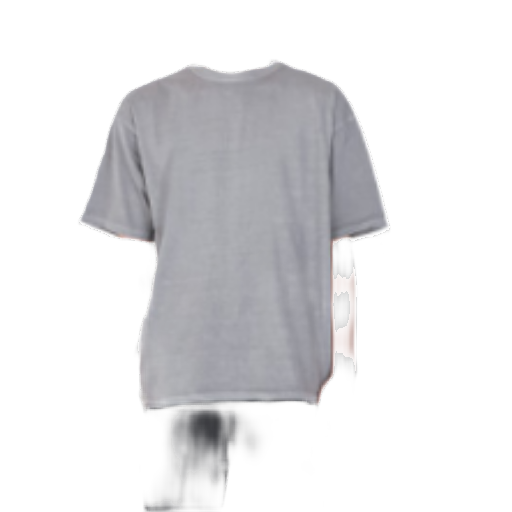

In [130]:
# 이미지 자르고, 투명값 검정배경 입혀주기.

image_crop = image[:,512:]
image_crop = np.uint8(image_crop)
# print(image_crop.shape)
cv2_imshow(image_crop)
# print(image_crop[0])
for i in image_crop:
    for j in i:
        if j[3] < 40:
            j[0] = 0
            j[1] = 0
            j[2] = 0

cv2_imshow(image_crop)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 164   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 159 156 155 160 165 153 149 151 154 153   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 158 155 166 164 168 165 160 160 163 165 160 146   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 176 165 161 164 167 166 167 165 165 167 168 165 152 217   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 157 153 166 171 172 170 167 168 167 169 159 170 152 152   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 158 105 174 166 172 170 170 172 169 165 159 166 151 15

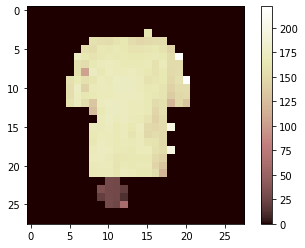

In [131]:
# 리사이즈 인풋값 맞춰 주기.
image_resize = cv2.resize(image_crop, (28,28))
cv2_imshow(image_resize)

# 그레이 스케일.. 후 픽셀 출력..
image_gray = cv2.cvtColor(image_resize, cv2.COLOR_BGRA2GRAY)
cv2_imshow(image_gray)
print(image_gray)

# 조금 더 크게 시각화..
plt.imshow(image_gray, cmap='pink')
plt.colorbar()
plt.show()

In [132]:
# 정규화 해준다.
input_image = image_gray/255.0
# print(input_image.shape)
# print(input_image)

In [133]:
# input값이 3차원 이여서 차원을 늘려준다.
input_image = np.reshape(input_image, (1,28,28))
input_image.shape
# input_image

(1, 28, 28)

In [ ]:
# 예측 범주
# 0 : 티셔츠 / 상의
# 1 : 바지
# 2 : 스웨터
# 3 : 드레스
# 4 : 코트
# 5 : 샌들
# 6 : 셔츠
# 7 : 운동화
# 8 : 가방
# 9 : 부츠

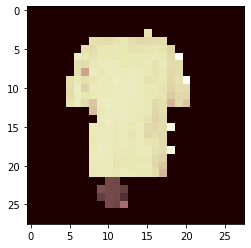

[[1.5202854 1.0005733 1.157424  1.0191666 1.0341595 1.0000005 1.191412  1.0000004 1.0769784 1.       ]]


In [134]:
#예측 수행
pred_X = model.predict(input_image)
#예측 이미지 확인 
plt.imshow(input_image.reshape(28,28), cmap = 'pink')
plt.show()

#예측 결과 확인 
print(pred_X+1)